In [1]:
from mnist_data import *
from mnist_classifier import *
from cifar_data import *
from cifar_classifier import *
from collect import *
from collections import defaultdict
import random

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATASET_TYPE = MnistData
CLASSIFIER_TYPE = MnistClassifier
DATASET_NAME = 'mnist'


DATASET_TYPE = Cifar10Data
CLASSIFIER_TYPE = Cifar10Classifier
DATASET_NAME = 'cifar10'

EPOCHS = 3
USE_FEATURES=  True
CLASS_REMOVED = 5
N_SAMPLES = [2**i for i in range(12)]

In [3]:
cls = CLASSIFIER_TYPE(use_features = USE_FEATURES, epochs = EPOCHS)
d = DATASET_TYPE(use_features=USE_FEATURES, class_removed=CLASS_REMOVED)
d.set_removed_class(CLASS_REMOVED)

Removed class # 5
current number of examples per class -- train:
 {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}

current number of examples per class -- test:
 {0: 893, 1: 904, 2: 900, 3: 913, 4: 909, 6: 909, 7: 891, 8: 896, 9: 887}


In [4]:

accuracies = []
for n in N_SAMPLES:
    d.set_number_of_samples_to_use(n)
    cls.fit(*d.into_fit())
    accuracies.append(cls.evaluate(*d.into_evaluate_one_class(CLASS_REMOVED))[1])



Train on 45001 samples, validate on 9000 samples
Epoch 1/3
45001/45001 [==============================] - 2s 47us/step - loss: 1.4947 - acc: 0.9560 - val_loss: 1.5349 - val_acc: 0.7952
Epoch 2/3
45001/45001 [==============================] - 2s 33us/step - loss: 1.1339 - acc: 0.9923 - val_loss: 1.6285 - val_acc: 0.7994
Epoch 3/3
898/898 [==============================] - 0s 18us/step
Test loss: 14.357620207397868
Test accuracy: 0.0
Train on 45002 samples, validate on 9000 samples
Epoch 1/3
45002/45002 [==============================] - 2s 36us/step - loss: 0.9832 - acc: 0.9505 - val_loss: 1.2822 - val_acc: 0.7966
Epoch 2/3
45002/45002 [==============================] - 2s 34us/step - loss: 1.5244 - acc: 0.9921 - val_loss: 1.7468 - val_acc: 0.7987
Epoch 3/3
898/898 [==============================] - 0s 22us/step
Test loss: 14.779903955608274
Test accuracy: 0.0
Train on 45004 samples, validate on 9000 samples
Epoch 1/3
45004/45004 [==============================] - 2s 37us/step - loss: 1

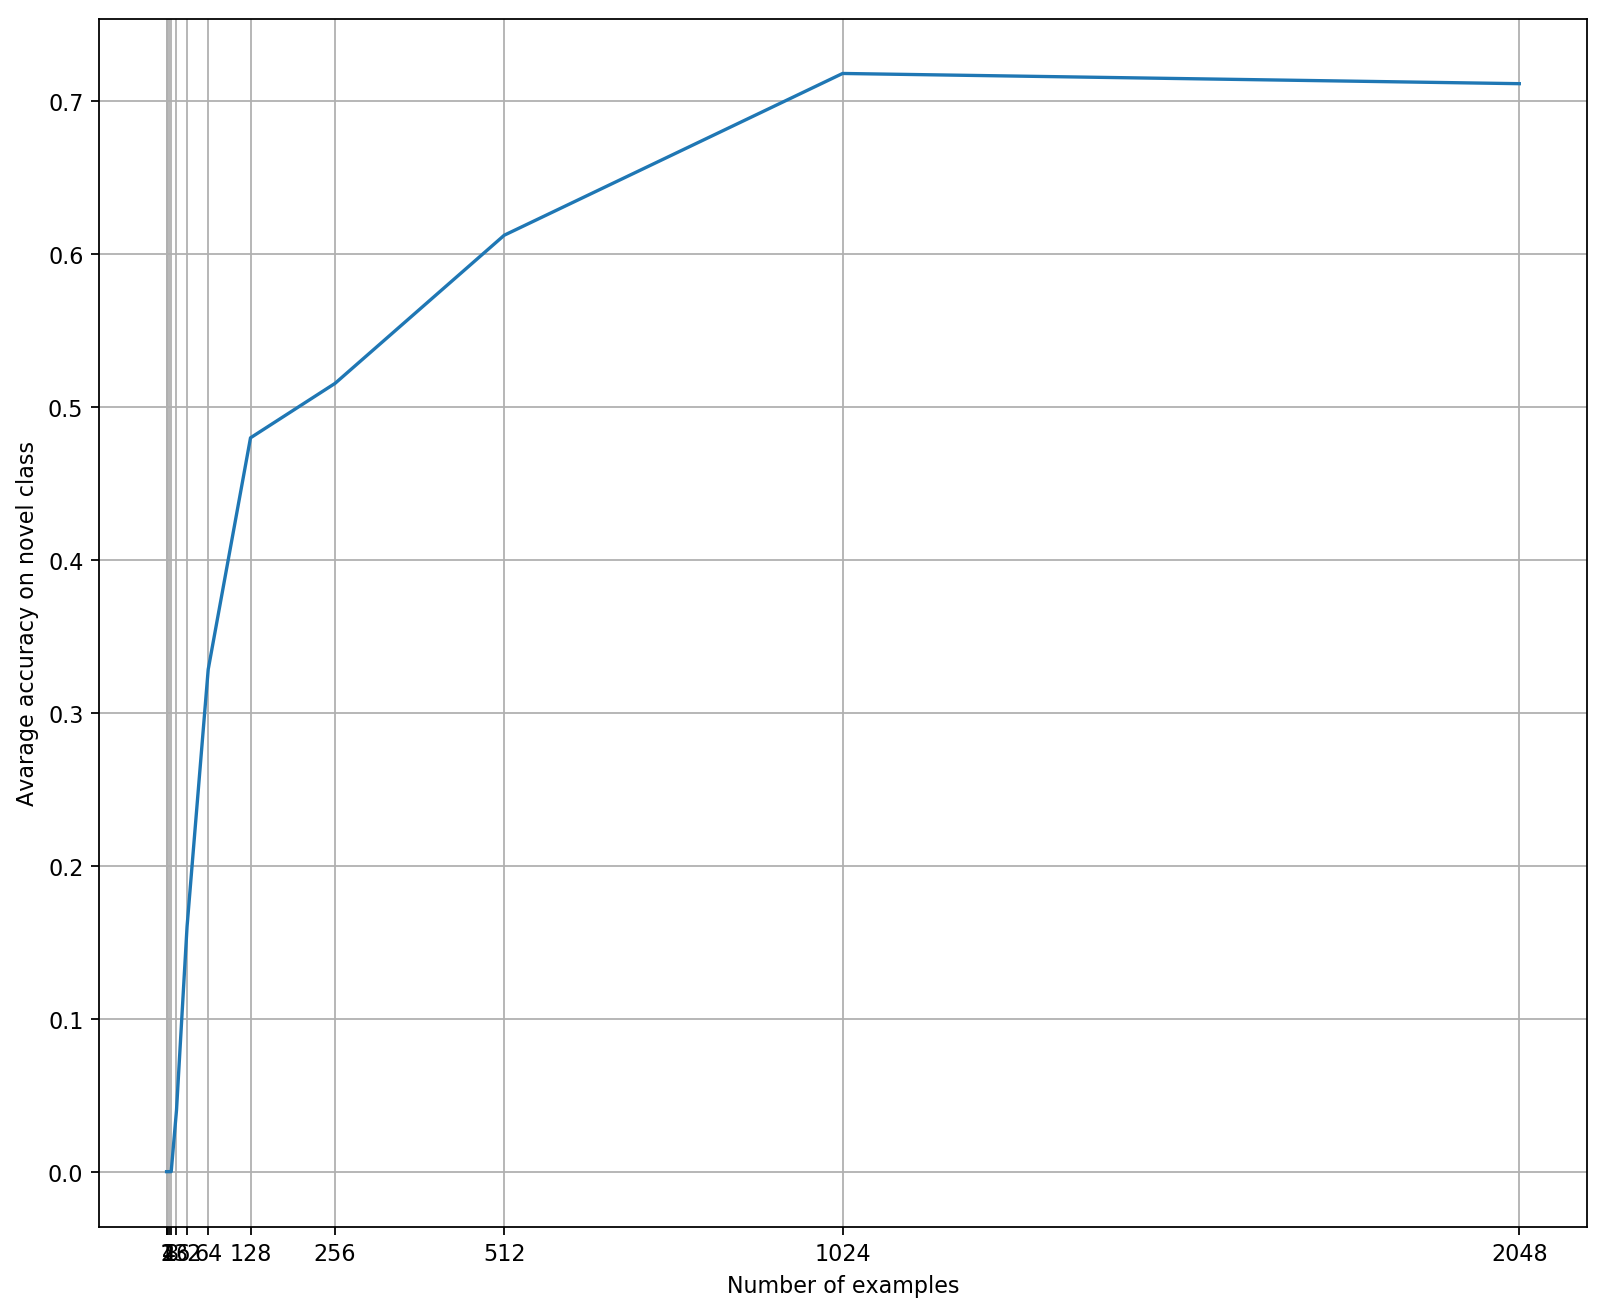

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10), dpi=160, facecolor='w', edgecolor='k')
plt.plot(N_SAMPLES, accuracies)
plt.xlabel('Number of examples')
plt.xticks(N_SAMPLES)
plt.ylabel('Avarage accuracy on novel class')
# plt.legend()
plt.grid()
# plt.title('Sanity check for index %d' % inx)


# Accuracy as function of number of centroids

In [6]:
n_clusters = 30
data = load_quadruplets(n_clusters, dataset_name=DATASET_NAME)
quadruplets, cat_to_centroids, cat_to_vectors, original_shape = data
print(cat_to_centroids.keys())

dict_keys([6, 9, 4, 1, 2, 7, 8, 3, 5, 0])


In [7]:
from scipy.spatial.distance import *

def euclidian_distance(x,y):
    return cosine(x,y)
#     return np.linalg.norm(x-y)


# features, and centroids from same class
def get_map_centroid_index_to_features(features, centroids):
    map_centroid_to_features = defaultdict(list)
    
    for f in features:
        distances = [euclidian_distance(c,f) for c in centroids]
        closest_centroid_index = np.argmin(distances)
        map_centroid_to_features[closest_centroid_index].append(f)
    
    return map_centroid_to_features



In [8]:
features = d.get_n_samples(5000)
centroids = cat_to_centroids[CLASS_REMOVED]

map_centroid_index_to_features = get_map_centroid_index_to_features(features, centroids)

In [9]:
print(len(map_centroid_index_to_features.keys()))

30


In [10]:
len(features)

3000

In [11]:
SWEET_SPOT = 256
N_CENTROIDS = list(range(1,31))


d.set_number_of_samples_to_use(0)
accuracies = []
for n_centroids in N_CENTROIDS:
    current_acc = 0
    for rep in range(1):
        samples = []
        for i in range(SWEET_SPOT):
            samples.append(random.choice(map_centroid_index_to_features[i % n_centroids]))

        d.set_generated_data(samples)
        cls.fit(*d.into_fit())
        current_acc += cls.evaluate(*d.into_evaluate_one_class(CLASS_REMOVED))[1] 
        
    accuracies.append(current_acc / 5)

Train on 45256 samples, validate on 9000 samples
Epoch 1/3
45256/45256 [==============================] - 2s 41us/step - loss: 0.3565 - acc: 0.9460 - val_loss: 0.6313 - val_acc: 0.8007
Epoch 2/3
45256/45256 [==============================] - 2s 34us/step - loss: 0.0708 - acc: 0.9896 - val_loss: 0.7837 - val_acc: 0.8014
Epoch 3/3
898/898 [==============================] - 0s 21us/step
Test loss: 5.53378856421048
Test accuracy: 0.017817371937639197
Train on 45256 samples, validate on 9000 samples
Epoch 1/3
45256/45256 [==============================] - 2s 40us/step - loss: 0.3990 - acc: 0.9374 - val_loss: 0.5574 - val_acc: 0.8097
Epoch 2/3
45256/45256 [==============================] - 2s 34us/step - loss: 0.0980 - acc: 0.9846 - val_loss: 0.6174 - val_acc: 0.8107
Epoch 3/3
898/898 [==============================] - 0s 20us/step
Test loss: 3.360045269496722
Test accuracy: 0.1291759465478842
Train on 45256 samples, validate on 9000 samples
Epoch 1/3
45256/45256 [===========================

45256/45256 [==============================] - 2s 47us/step - loss: 0.4448 - acc: 0.9312 - val_loss: 0.4907 - val_acc: 0.8246
Epoch 2/3
45256/45256 [==============================] - 2s 35us/step - loss: 0.1727 - acc: 0.9719 - val_loss: 0.4855 - val_acc: 0.8300
Epoch 3/3
898/898 [==============================] - 0s 21us/step
Test loss: 1.2843253360293756
Test accuracy: 0.5100222717149221
Train on 45256 samples, validate on 9000 samples
Epoch 1/3
45256/45256 [==============================] - 2s 47us/step - loss: 0.4524 - acc: 0.9297 - val_loss: 0.4831 - val_acc: 0.8311
Epoch 2/3
45256/45256 [==============================] - 2s 34us/step - loss: 0.1768 - acc: 0.9708 - val_loss: 0.4829 - val_acc: 0.8358
Epoch 3/3
898/898 [==============================] - 0s 19us/step
Test loss: 1.497266052560445
Test accuracy: 0.4420935412026726
Train on 45256 samples, validate on 9000 samples
Epoch 1/3
45256/45256 [==============================] - 2s 46us/step - loss: 0.4511 - acc: 0.9280 - val_loss

Epoch 2/3
45256/45256 [==============================] - 2s 34us/step - loss: 0.1898 - acc: 0.9699 - val_loss: 0.4800 - val_acc: 0.8354
Epoch 3/3
898/898 [==============================] - 0s 21us/step
Test loss: 1.1461441952295452
Test accuracy: 0.5534521158129176
Train on 45256 samples, validate on 9000 samples
Epoch 1/3
45256/45256 [==============================] - 2s 53us/step - loss: 0.4636 - acc: 0.9298 - val_loss: 0.4821 - val_acc: 0.8278
Epoch 2/3
45256/45256 [==============================] - 2s 34us/step - loss: 0.1860 - acc: 0.9698 - val_loss: 0.4803 - val_acc: 0.8347
Epoch 3/3
898/898 [==============================] - 0s 19us/step
Test loss: 1.2738290220698163
Test accuracy: 0.49665924276169265


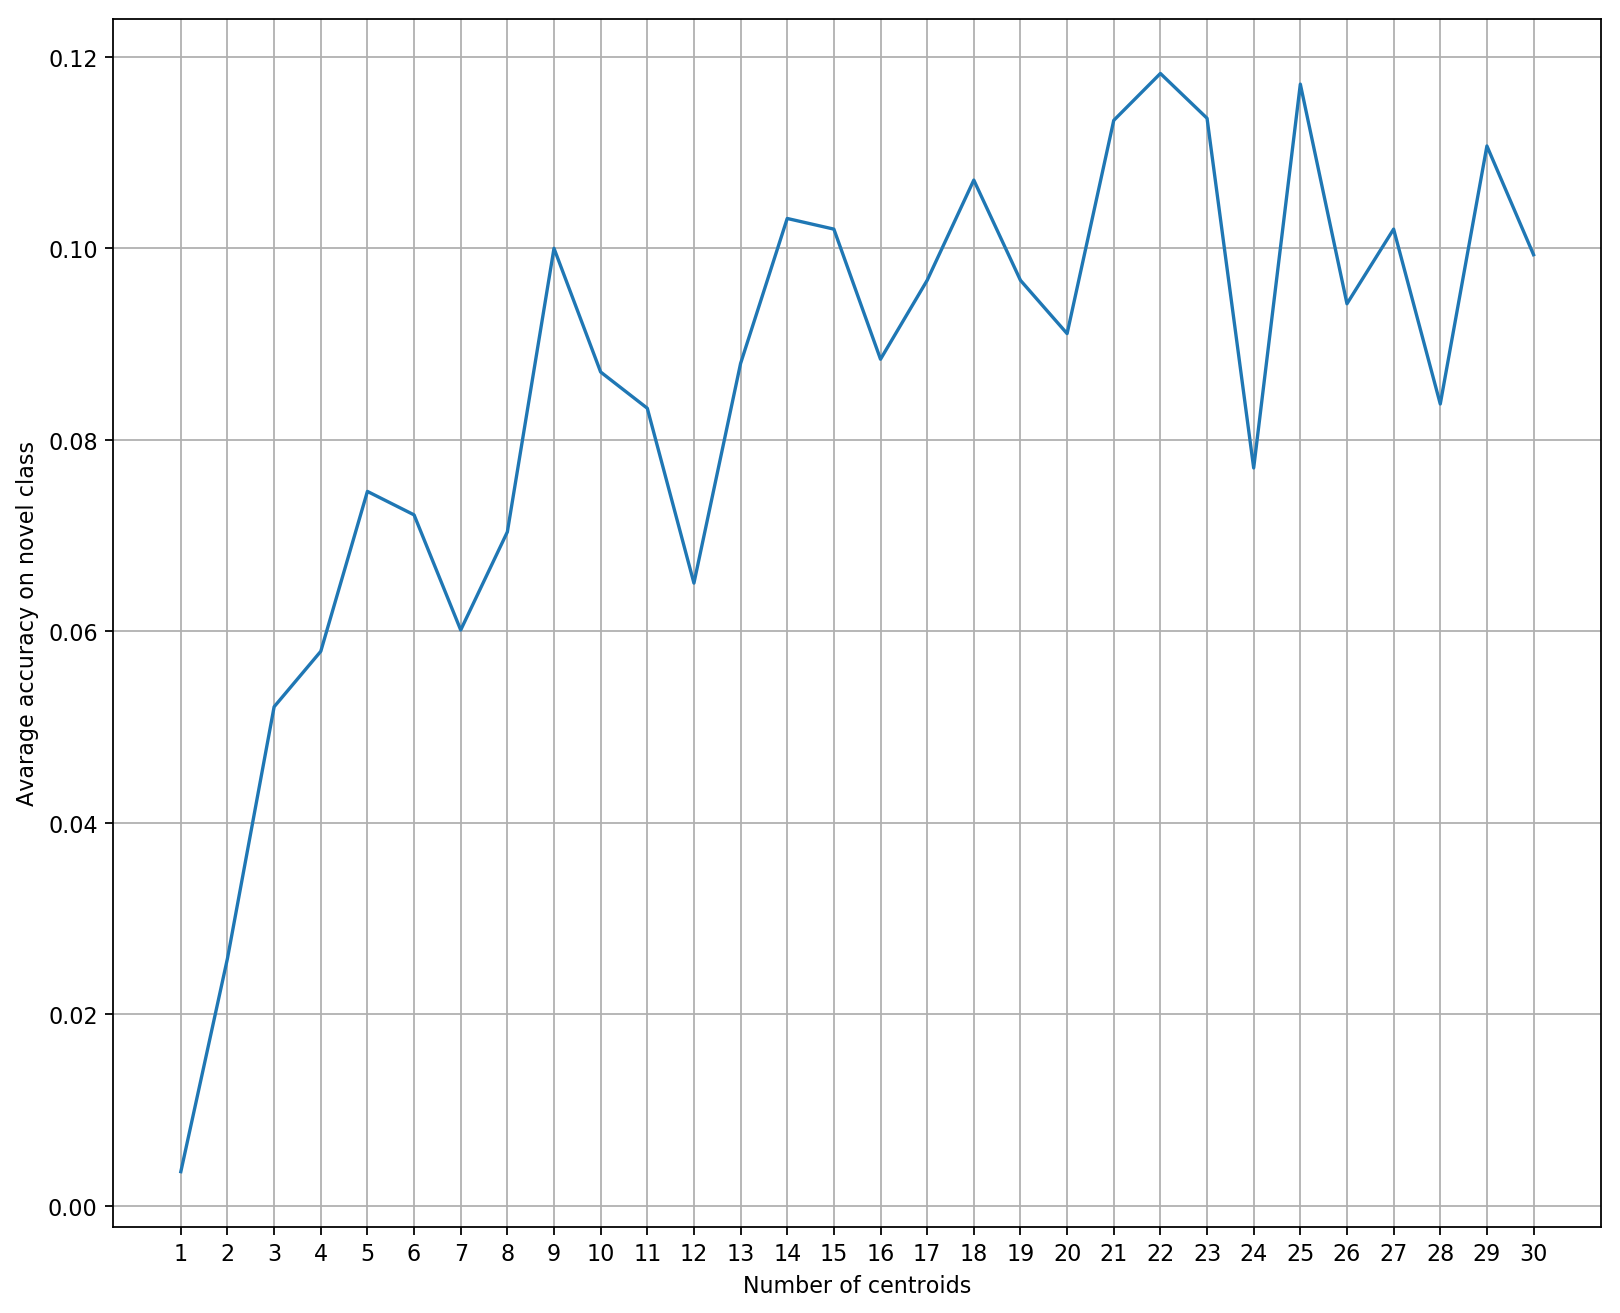

In [12]:
fig = plt.figure(figsize=(12, 10), dpi=160, facecolor='w', edgecolor='k')
plt.plot(N_CENTROIDS, accuracies)
plt.xlabel('Number of centroids')
plt.xticks(N_CENTROIDS)
plt.ylabel('Avarage accuracy on novel class')
# plt.legend()
plt.grid()
# plt.title('Sanity check for index %d' % inx)

In [13]:
accuracies

[0.0035634743875278393,
 0.025835189309576838,
 0.05211581291759465,
 0.0579064587973274,
 0.07461024498886414,
 0.07216035634743875,
 0.060133630289532294,
 0.07037861915367484,
 0.1,
 0.08708240534521158,
 0.08329621380846325,
 0.06503340757238307,
 0.08797327394209355,
 0.10311804008908684,
 0.10200445434298441,
 0.08841870824053452,
 0.09665924276169266,
 0.10712694877505569,
 0.09665924276169266,
 0.0910913140311804,
 0.1133630289532294,
 0.11826280623608018,
 0.1135857461024499,
 0.07706013363028953,
 0.11714922048997774,
 0.09420935412026726,
 0.10200445434298441,
 0.08374164810690424,
 0.11069042316258353,
 0.09933184855233854]